# Ensemble Models

In [15]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity

import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
# use 'pip install --upgrade scikit-learn' in Anaconda prompt to upgrade sklearn if needed to install StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *

%matplotlib inline


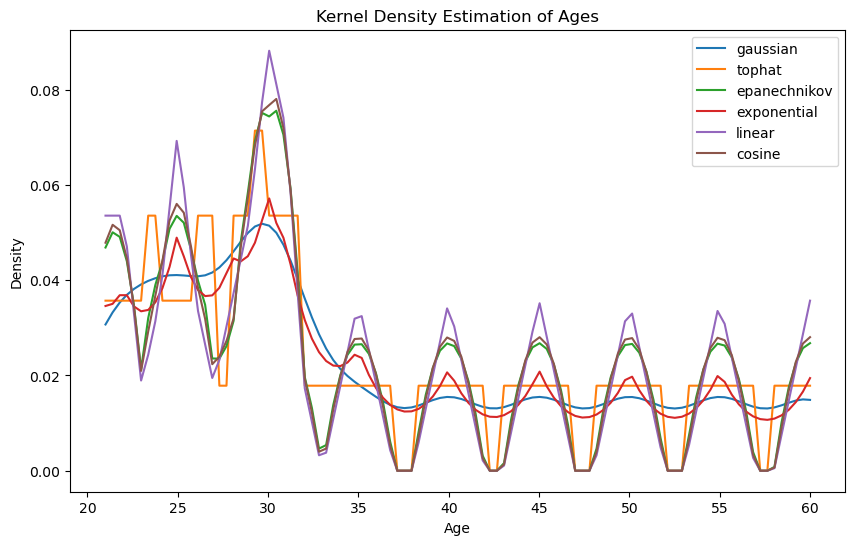

In [17]:
#Q 1 

ages = [21, 22, 25, 25, 28, 30, 30, 31, 35, 40, 45, 50, 55, 60]
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidth = 2

ages_array = np.array(ages).reshape(-1, 1)
x_grid = np.linspace(min(ages), max(ages), 100)[:, np.newaxis]

plt.figure(figsize=(10, 6))
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(ages_array)
    log_dens = kde.score_samples(x_grid)
    plt.plot(x_grid[:, 0], np.exp(log_dens), label=kernel)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Ages')
plt.legend()
plt.show()



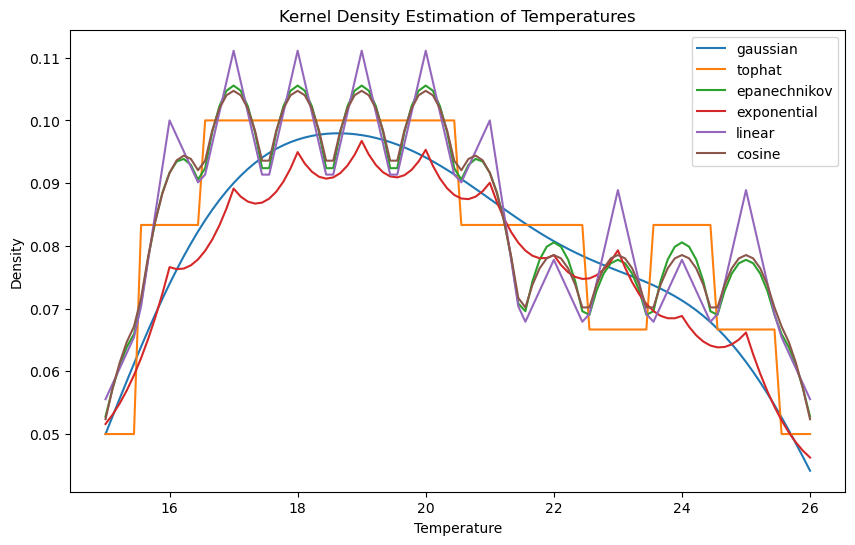

In [18]:
#Q 2

temperatures = [15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 23, 23, 24, 25, 25, 26]
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidth = 1.5

temp_array = np.array(temperatures).reshape(-1, 1)
x_grid = np.linspace(min(temperatures), max(temperatures), 100)[:, np.newaxis]

plt.figure(figsize=(10, 6))
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(temp_array)
    log_dens = kde.score_samples(x_grid)
    plt.plot(x_grid[:, 0], np.exp(log_dens), label=kernel)
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Temperatures')
plt.legend()
plt.show()


In [32]:
# Q 4

# import data
data = pd.read_csv('https://www.dropbox.com/scl/fi/54z00lt9xordedlfuskq7/advertising.csv?rlkey=duatthqnolkott1ejfpx5owtd&dl=1')
# Prepare the data
X = data[['Age', 'Daily Time Spent on Site', 'Income', 'Male', 'Daily Internet Usage']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

n_estimators_list = [10, 50, 100]
results = {}

for n_estimators in n_estimators_list:
    ada_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=101)
    ada_model.fit(X_train, y_train)
    y_pred_prob = ada_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    results[n_estimators] = auc

best_n_estimators = max(results, key=results.get)
print(f"Number of base models with highest AUC: {best_n_estimators}, AUC: {results[best_n_estimators]:.4f}")



C:\Users\sherp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\sherp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\sherp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Number of base models with highest AUC: 10, AUC: 0.9815


In [30]:
# Q 5

# import data
data = pd.read_csv('https://www.dropbox.com/scl/fi/54z00lt9xordedlfuskq7/advertising.csv?rlkey=duatthqnolkott1ejfpx5owtd&dl=1')

# Prepare the data
X = data[['Age', 'Daily Time Spent on Site', 'Income', 'Male', 'Daily Internet Usage']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Define the base models
base_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy'),
    'SVM': SVC(C=1, gamma='scale', kernel='rbf', probability=True)
}

# Train base models and get predictions
base_predictions = {}
for name, model in base_models.items():
    model.fit(X_train, y_train)
    base_predictions[name] = model.predict_proba(X_test)[:,1]

# Create a new dataframe with base model predictions as features
stacking_X_test = pd.DataFrame(base_predictions)
stacking_X_train = pd.DataFrame({name: model.predict_proba(X_train)[:,1] for name, model in base_models.items()})


# Train a meta-learner
meta_learner = LogisticRegression(solver='liblinear')
meta_learner.fit(stacking_X_train, y_train)

# Make predictions
stacked_predictions = meta_learner.predict(stacking_X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, stacked_predictions)
print(f"Accuracy of the stacked model: {accuracy:.2f}")



Accuracy of the stacked model: 0.95


# Bagging

In [ ]:
# base_estimator: predictive model to combine
# n_estimators: # of models
# e.g. here, combine 10 SVMs
model = BaggingClassifier(estimator=SVC(gamma = 'auto'), n_estimators=10, random_state=101)

# train the model
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)

# print the metrics
confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Bagging Ensemble', y_pred, y_test)


confusion matrix: 
 [[102  47]
 [ 30 121]]
______________________________________________
Model: Bagging Ensemble
Accuracy: 0.7433333333333333
Precision: 0.7202380952380952
Recall: 0.8013245033112583
F1-score: 0.7586206896551724
AUC: 0.74294413085026
______________________________________________



# Boosting (AdaBoost)

In [ ]:
# n_estimators: # of models to include (to build in sequence)
model = AdaBoostClassifier(n_estimators=50, random_state=101)

# train model
model.fit(X_train, y_train)

# predict for test set
y_pred = model.predict(X_test)

# print metrics
confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('AdaBoost', y_pred, y_test)


confusion matrix: 
 [[ 94  55]
 [ 32 119]]
______________________________________________
Model: AdaBoost
Accuracy: 0.71
Precision: 0.6839080459770115
Recall: 0.7880794701986755
F1-score: 0.7323076923076923
AUC: 0.709475976710076
______________________________________________



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Stacking

In [ ]:
# choose the base models to make predictions with
# e.g. logistic regression, random forest, SVM
# enclose the base models in square brackets
estimators = [('lr', LogisticRegression(max_iter = 1000)),
              ('rf', RandomForestClassifier(n_estimators=10, random_state=101)),
              ('svm', SVC(random_state=101))]

# define the stacking ensemble
# estimators: list of models
# final_estimator: what we feed the predictions as x-vars into
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter = 1000))

# train model
model.fit(X_train, y_train)

# predict for test set
y_pred = model.predict(X_test)

# get metrics
confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Stacking Ensemble', y_pred, y_test)



confusion matrix: 
 [[101  48]
 [ 28 123]]
______________________________________________
Model: Stacking Ensemble
Accuracy: 0.7466666666666667
Precision: 0.7192982456140351
Recall: 0.8145695364238411
F1-score: 0.7639751552795031
AUC: 0.7462109427085648
______________________________________________

